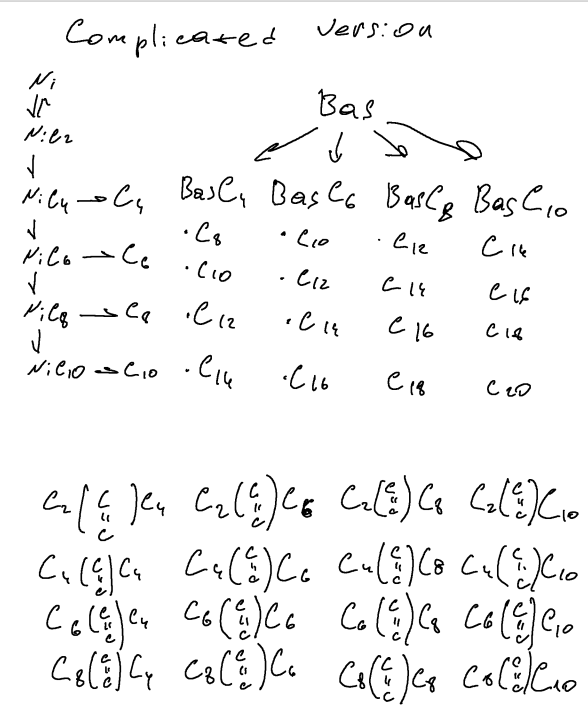

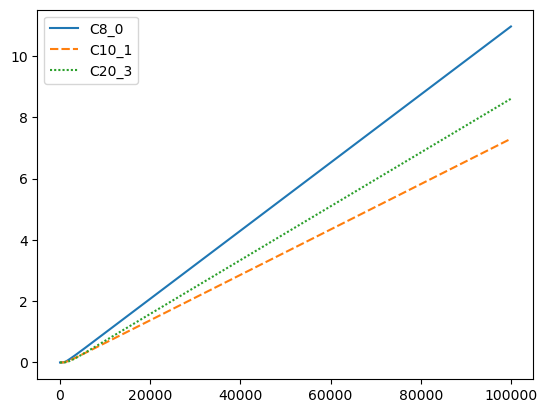

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns
from reactor import Reaction

k_grow_ni = 1e-2
k_death_ni = 5e-3
k_grow_bas = 1e-3
k_death_bas = 1e-2


d0 = 1e-2
d1 = d0 * 0.5 
d2 = d1 * 0.5
d3 = d2 * 0.5
d4 = d3 * 0.5

reaction_list = [
                ['Ni + C2 <-> NiC2', k_grow_ni, k_grow_ni],
                ['NiC2 + C2 -> NiC4', k_grow_ni],['NiC4 -> C4 + Ni', k_death_ni],
                ['NiC4 + C2 -> NiC6', k_grow_ni],['NiC6 -> C6 + Ni', k_death_ni],
                ['NiC6 + C2 -> NiC8', k_grow_ni],['NiC8 -> C8 + Ni', k_death_ni],
                ['NiC8 + C2 -> NiC10', k_grow_ni],['NiC10 -> C10 + Ni', k_death_ni],
                
                ['C4 -> C4_diff', d0], ['C6 -> C6_diff', d1], ['C8 -> C8_diff', d2], ['C10 -> C10_diff', d3],
                
                ['Bas + C4 -> BasC4_0', k_grow_bas],
                ['BasC4_0 + C4 -> BasC8_0', k_grow_bas],['BasC8_0 -> C8_0 + Bas', k_death_bas],
                ['BasC4_0 + C6 -> BasC10_0', k_grow_bas],['BasC10_0 -> C10_0 + Bas', k_death_bas],
                ['BasC4_0 + C8 -> BasC12_0', k_grow_bas],['BasC12_0 -> C12_0 + Bas', k_death_bas],
                ['BasC4_0 + C10 -> BasC14_0', k_grow_bas],['BasC14_0 -> C14_0 + Bas', k_death_bas],

                ['Bas + C6 -> BasC6_1', k_grow_bas],
                ['BasC6_1 + C4 -> BasC10_1', k_grow_bas],['BasC10_1 -> C10_1 + Bas', k_death_bas],
                ['BasC6_1 + C6 -> BasC12_1', k_grow_bas],['BasC12_1 -> C12_1 + Bas', k_death_bas],
                ['BasC6_1 + C8 -> BasC14_1', k_grow_bas],['BasC14_1 -> C14_1 + Bas', k_death_bas],
                ['BasC6_1 + C10 -> BasC16_1', k_grow_bas],['BasC16_1 -> C16_1 + Bas', k_death_bas],

                ['Bas + C8 -> BasC8_2', k_grow_bas],
                ['BasC8_2 + C4 -> BasC12_2', k_grow_bas],['BasC12_2 -> C12_2 + Bas', k_death_bas],
                ['BasC8_2 + C6 -> BasC14_2', k_grow_bas],['BasC14_2 -> C14_2 + Bas', k_death_bas],
                ['BasC8_2 + C8 -> BasC16_2', k_grow_bas],['BasC16_2 -> C16_2 + Bas', k_death_bas],
                ['BasC8_2 + C10 -> BasC18_2', k_grow_bas],['BasC18_2 -> C18_2 + Bas', k_death_bas],

                ['Bas + C10 -> BasC10_3', k_grow_bas],
                ['BasC10_3 + C4 -> BasC14_3', k_grow_bas],['BasC14_3 -> C14_3 + Bas', k_death_bas],
                ['BasC10_3 + C6 -> BasC16_3', k_grow_bas],['BasC16_3 -> C16_3 + Bas', k_death_bas],
                ['BasC10_3 + C8 -> BasC18_3', k_grow_bas],['BasC18_3 -> C18_3 + Bas', k_death_bas],
                ['BasC10_3 + C10 -> BasC20_3', k_grow_bas],['BasC20_3 -> C20_3 + Bas', k_death_bas],
                 ]

reaction = Reaction(reaction_list, fixed_concentrations=['C2'])

dt = 1
solution = reaction.solve({'C2': 1, 'Ni': 1, 'Bas': 1}, np.arange(0, 100_000, dt))
sns.lineplot(df[['C8_0', 'C10_1', 'C20_3']])
df = solution.diff().dropna().applymap(lambda x: x/dt)

In [28]:
df.Bas

,Bas,BasC10_0,BasC10_1,BasC10_3,BasC12_0,BasC12_1,BasC12_2,BasC14_0,BasC14_1,BasC14_2,...,C4,C6,C8,C8_0,Ni,NiC10,NiC2,NiC4,NiC6,NiC8
1,-2.296441e-11,2.112808e-24,1.523020e-24,1.855108e-19,4.774870e-27,4.771270e-27,2.677645e-27,8.448574e-30,1.082507e-29,8.425184e-30,...,8.214096e-08,2.282318e-10,5.634520e-13,1.272163e-24,-0.009901,1.126002e-12,0.009851,0.000049,1.636429e-07,4.548860e-10
2,-3.113897e-10,3.229944e-22,2.473041e-22,1.304428e-17,1.240286e-24,1.238710e-24,7.469851e-25,3.852084e-27,4.884016e-27,3.833359e-27,...,5.684861e-07,3.079886e-09,1.351565e-11,1.834747e-22,-0.009705,2.699396e-11,0.009559,0.000145,1.128349e-06,6.121927e-09
3,-1.327371e-09,1.000858e-20,8.079953e-21,2.147481e-16,5.795833e-23,5.786724e-23,3.838283e-23,2.806460e-25,3.394384e-25,2.787156e-25,...,1.522154e-06,1.305514e-08,8.652549e-11,5.456800e-21,-0.009514,1.726730e-10,0.009275,0.000236,3.007753e-06,2.586801e-08
4,-3.530145e-09,1.340422e-19,1.073867e-19,1.469354e-15,1.088446e-21,1.086109e-21,7.199902e-22,7.481596e-24,8.967710e-24,7.409445e-24,...,2.920508e-06,3.451191e-08,3.113791e-10,7.309200e-20,-0.009327,6.208985e-10,0.008998,0.000323,5.744382e-06,6.815196e-08
5,-7.374255e-09,8.015739e-19,6.420245e-19,5.960091e-15,7.812669e-21,7.792792e-21,5.184126e-21,6.470258e-23,7.720425e-23,6.395268e-23,...,4.742951e-06,7.165964e-08,8.185976e-10,4.351847e-19,-0.009144,1.631096e-09,0.008728,0.000406,9.285255e-06,1.410272e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.336809e-19,0.000000e+00,...,-1.110223e-16,0.000000e+00,0.000000e+00,1.111111e-04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
99996,0.000000e+00,-8.673617e-19,-8.673617e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.734723e-18,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.551115e-17,-5.551115e-17,1.111111e-04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
99997,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.673617e-19,-8.673617e-19,-8.673617e-19,0.000000e+00,0.000000e+00,-4.336809e-19,...,0.000000e+00,0.000000e+00,0.000000e+00,1.111111e-04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
99998,0.000000e+00,-8.673617e-19,-8.673617e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.336809e-19,0.000000e+00,...,-1.110223e-16,-5.551115e-17,-5.551115e-17,1.111111e-04,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
